In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
symtoms=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
    'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
    'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
    'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
    'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
    'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
    'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
    'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
    'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
    'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
    'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
    'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
    'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
    'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
    'yellow_crust_ooze']

In [3]:
#List of Diseases is listed in list disease.

disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

In [4]:
l=[]
for i in range(0,len(symtoms)):
    l.append(0)
print(l)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
#Reading the training .csv file
df=pd.read_csv("symtoms.csv")
DF= pd.read_csv('symtoms.csv', index_col='prognosis')
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
#df.head()
DF.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [8]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

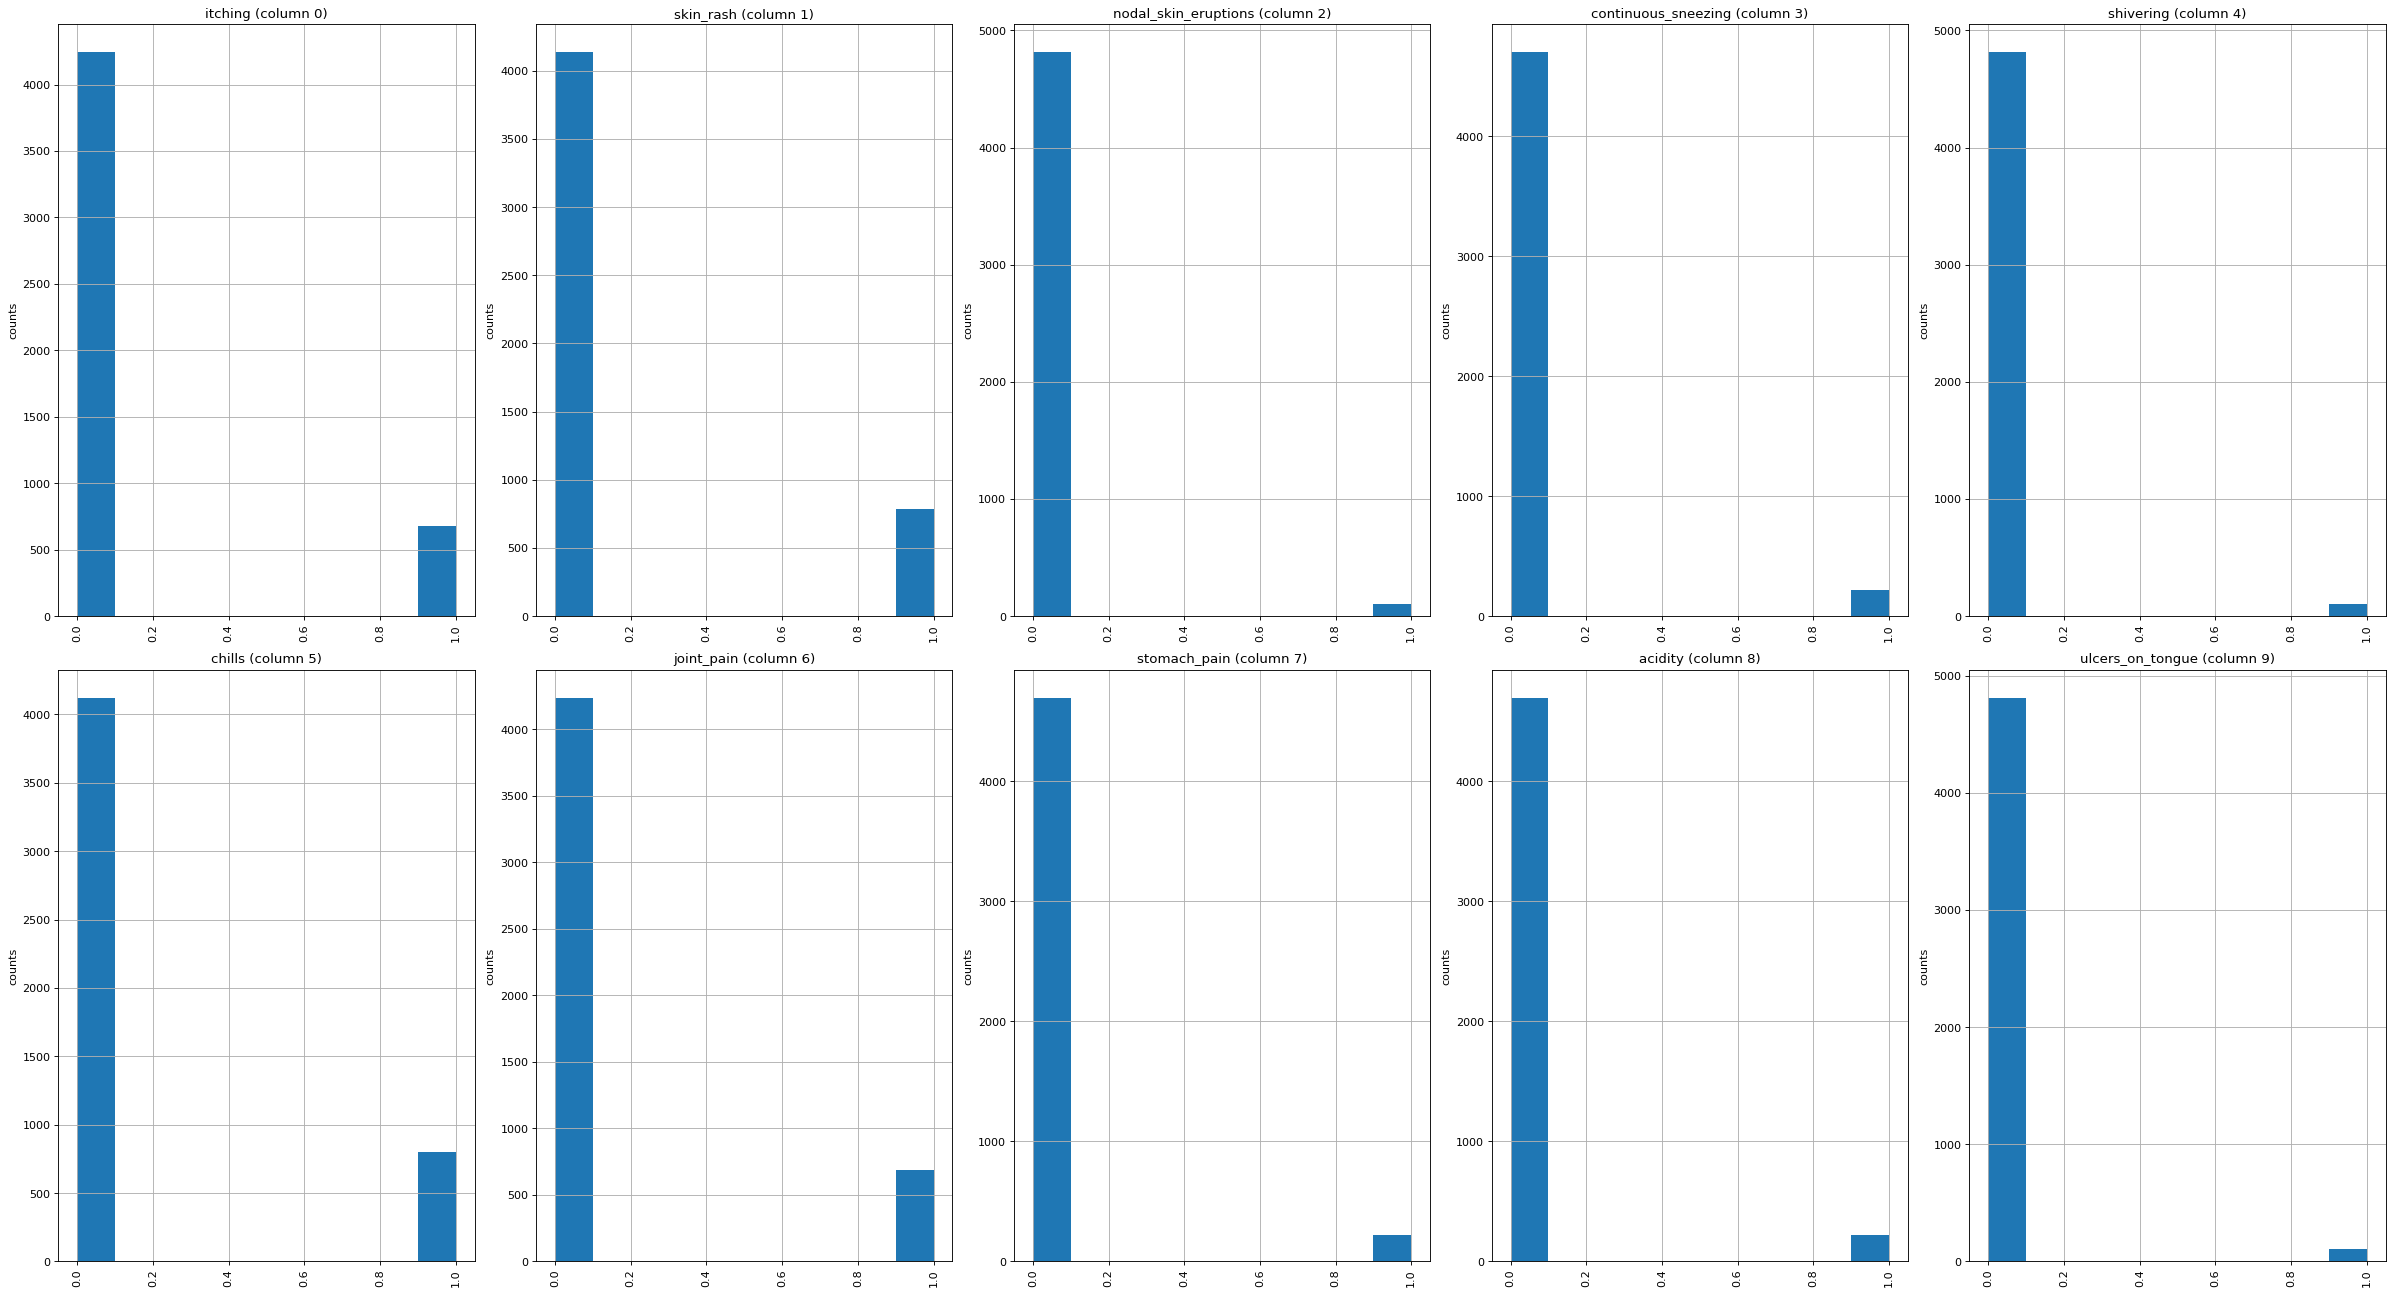

In [9]:
plotPerColumnDistribution(df, 10, 5)

<ipython-input-8-7fd6cf3c5aab>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df1 = df1.dropna('columns')


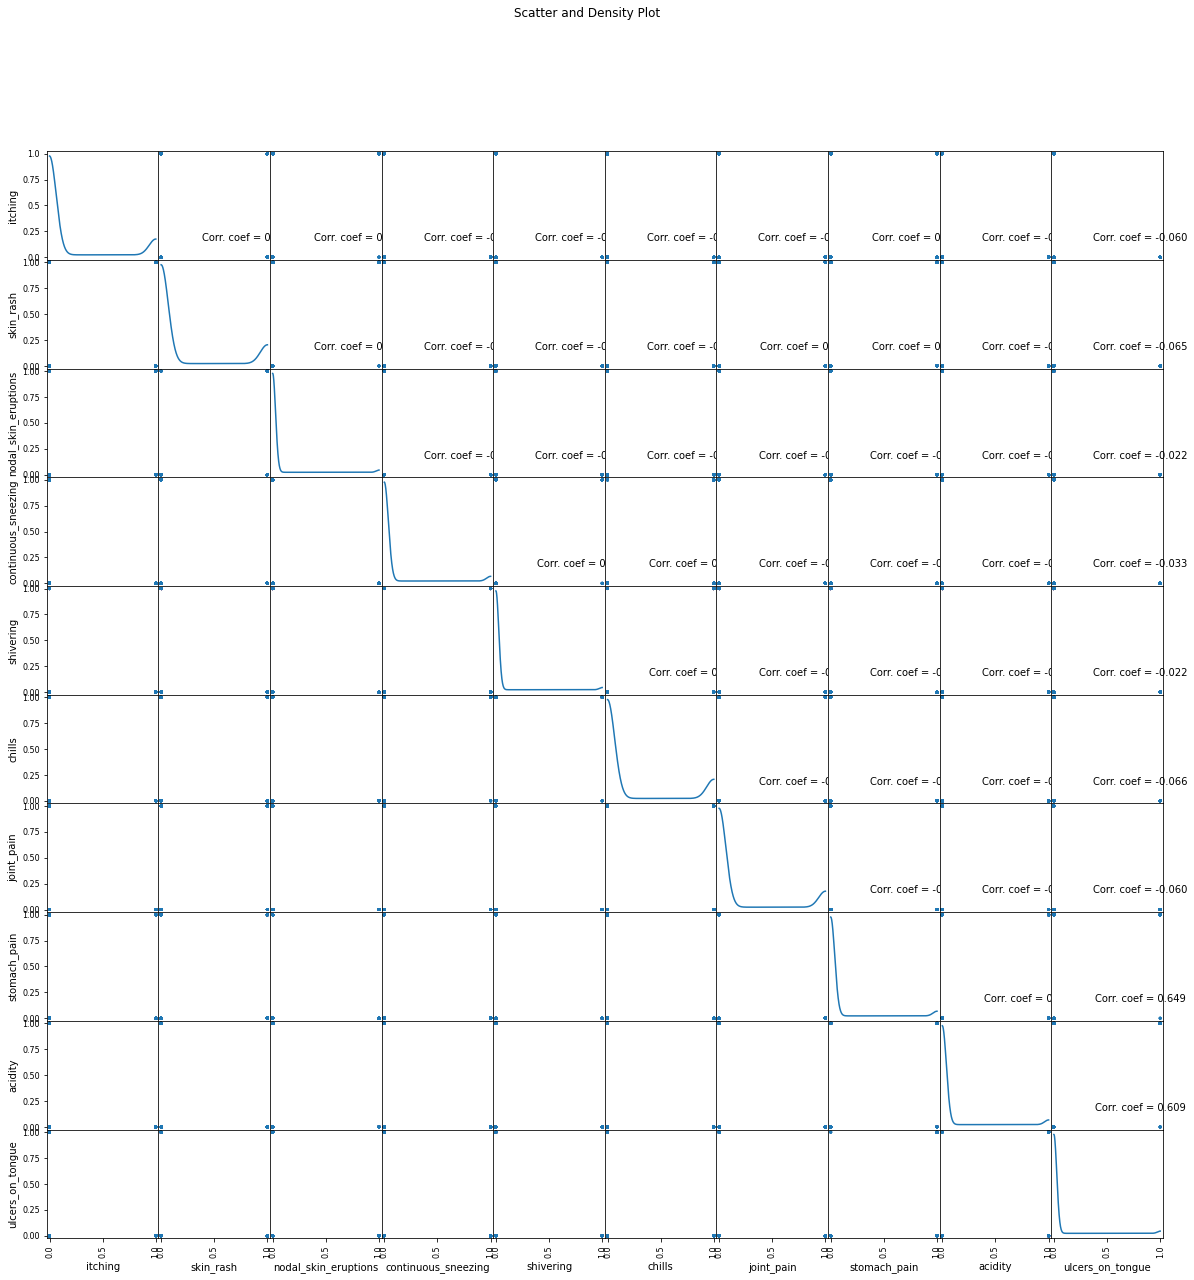

In [10]:
plotScatterMatrix(df, 20, 10)

In [11]:
X= df[symtoms]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0             0             0               0          0           0   
1             0             0               0          0           0   
2             0             0               0          0           0   
3             0             0               0          0           0   
4             0             0               0          0           0   
...         ...           ...             ...        ...         ...   
4915          0             0               0          0           0   
4916          0             0               0          0           0   
4917          0             0               0          0           0   
4918          0             0               0          0           0   
4919          0             0               0          0           0   

      yellow_urine  yellowing_of_eyes  acute_liver_failure  fluid_overload  \
0                0                  0                    

In [12]:
print(y)

      prognosis
0             0
1             0
2             0
3             0
4             0
...         ...
4915         36
4916         37
4917         38
4918         39
4919         40

[4920 rows x 1 columns]


In [13]:
#Reading the  testing.csv file
tr=pd.read_csv("symtoms_test.csv")

#Using inbuilt function replace in pandas for replacing the values

tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
tr.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4


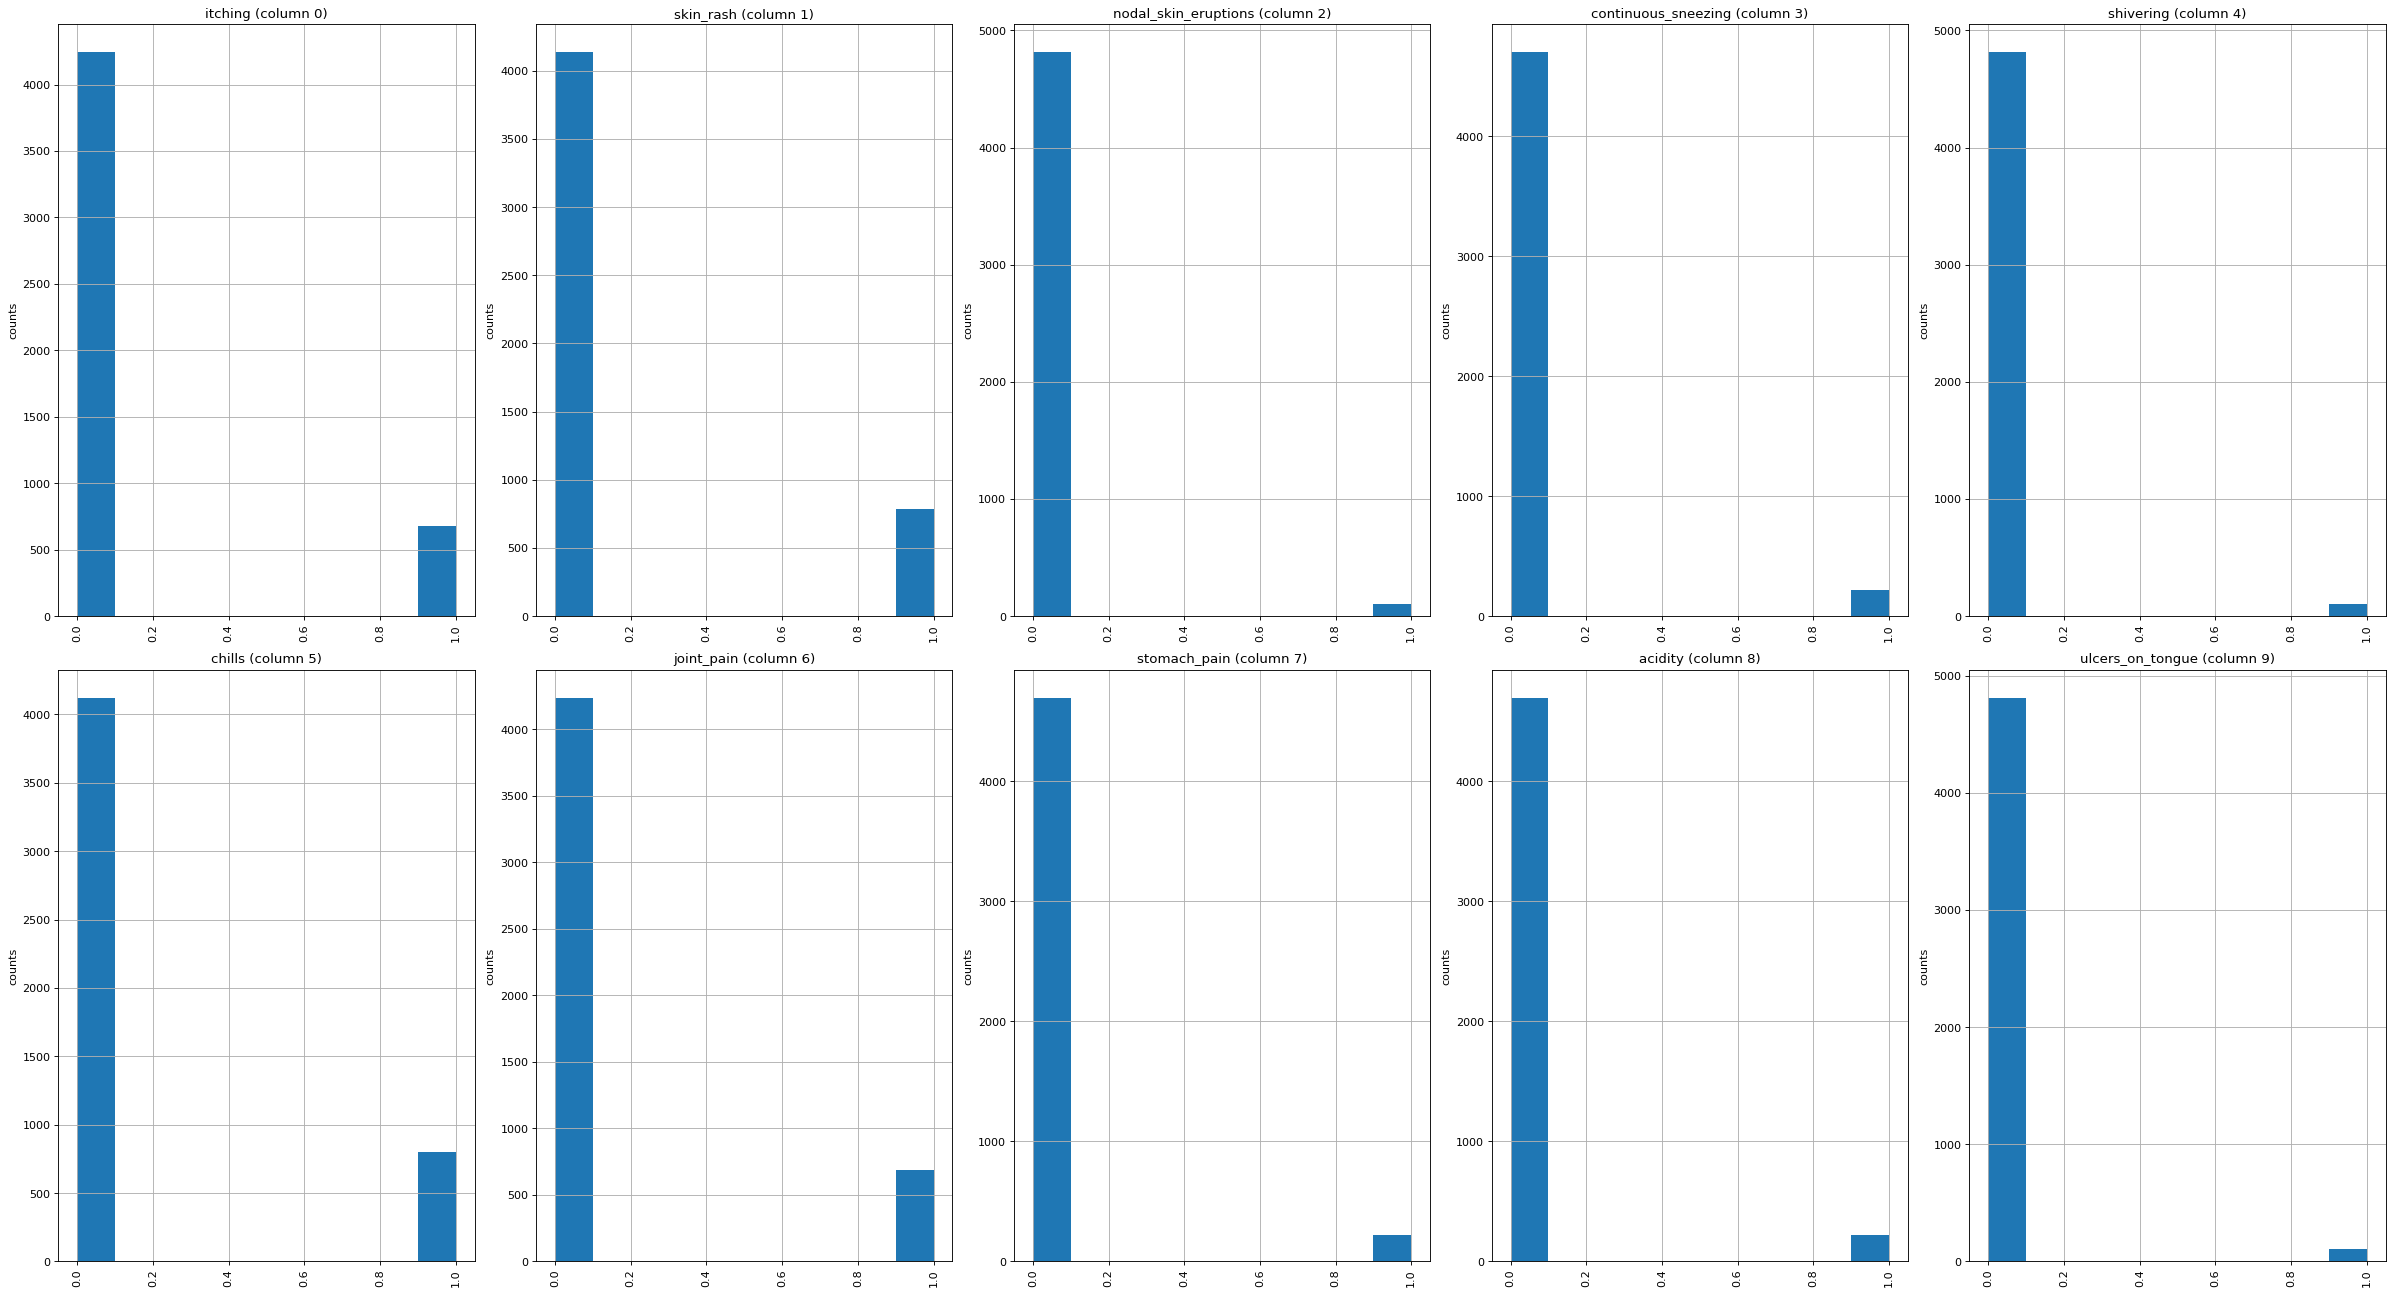

In [14]:
plotPerColumnDistribution(tr, 10, 5)

In [15]:
X_test= tr[symtoms]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

    back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0           0             0               0          0           0   
1           0             0               0          0           0   
2           0             0               0          0           0   
3           0             0               1          0           0   
4           0             0               0          0           0   
5           0             0               1          0           0   
6           0             0               0          0           0   
7           0             0               0          0           0   
8           0             0               0          1           0   
9           0             0               0          0           0   
10          0             0               0          0           0   
11          0             0               0          0           0   
12          1             0               0          0           0   
13          0       

In [16]:
print(y_test)

    prognosis
0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13         13
14         14
15         15
16         16
17         17
18         18
19         19
20         20
21         21
22         22
23         23
24         24
25         25
26         26
27         27
28         28
29         29
30         30
31         31
32         32
33         33
34         34
35         35
36         36
37         37
38         38
39         39
40         40


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
len(X_train), len(y_train)

(3936, 3936)

In [20]:
len(X_test), len(y_test)

(984, 984)

In [21]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)

In [22]:
clf_dt.score(X, y)

0.9365853658536586

In [23]:
disease_pred = clf_dt.predict(X)

In [24]:
disease_real = y.values